Import Libraries

In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from libraries import *
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

Import Data

In [2]:
%%time
dataTrain = pd.read_csv('data/train/08_M01_DC_train.csv')
dataFault = pd.read_csv('data/train/train_faults/08_M01_train_fault_data.csv')

Wall time: 12.6 s


Exploratory Analysis

In [3]:
dataTrain.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
0,3283162,08M01,366,2465,10511435,481,3,-0.018959,-0.132713,0.012500,...,-0.152159,0.549830,-0.981442,-0.511561,-0.08616,1.0,1.658163,0.209741,0.487876,-0.696642
1,3283166,08M01,366,2465,10511435,481,3,-0.018959,-0.131884,0.014437,...,-0.164519,0.549830,-0.981442,-0.511561,-0.08616,1.0,1.658165,0.209744,0.487879,-0.696642
2,3283170,08M01,366,2465,10511435,481,3,-0.018959,-0.132437,0.001577,...,-0.164519,0.549830,-0.981442,-0.511561,-0.08616,1.0,1.658167,0.209747,0.487882,-0.696642
3,3283174,08M01,366,2465,10511435,481,3,-0.018959,-0.132713,0.018836,...,-0.149940,0.566786,-0.981442,-0.511561,-0.08616,1.0,1.658170,0.209750,0.487885,-0.696642
4,3283178,08M01,366,2465,10511435,481,3,-0.018959,-0.131607,0.006156,...,-0.164519,0.566786,-0.981442,-0.511561,-0.08616,1.0,1.658172,0.209752,0.487888,-0.696642


In [4]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716092 entries, 0 to 3716091
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   time                     int64  
 1   Tool                     object 
 2   stage                    int64  
 3   Lot                      int64  
 4   runnum                   int64  
 5   recipe                   int64  
 6   recipe_step              int64  
 7   IONGAUGEPRESSURE         float64
 8   ETCHBEAMVOLTAGE          float64
 9   ETCHBEAMCURRENT          float64
 10  ETCHSUPPRESSORVOLTAGE    float64
 11  ETCHSUPPRESSORCURRENT    float64
 12  FLOWCOOLFLOWRATE         float64
 13  FLOWCOOLPRESSURE         float64
 14  ETCHGASCHANNEL1READBACK  float64
 15  ETCHPBNGASREADBACK       float64
 16  FIXTURETILTANGLE         float64
 17  ROTATIONSPEED            float64
 18  ACTUALROTATIONANGLE      float64
 19  FIXTURESHUTTERPOSITION   float64
 20  ETCHSOURCEUSAGE          float64
 21  ETCHAUXS

In [5]:
dataFault.head()

,time,fault_name,Tool
0,5816876,FlowCool Pressure Dropped Below Limit,08M01
1,6562542,FlowCool Pressure Dropped Below Limit,08M01
2,6760814,FlowCool Pressure Dropped Below Limit,08M01
3,7858308,FlowCool Pressure Dropped Below Limit,08M01
4,9157656,FlowCool Pressure Dropped Below Limit,08M01


In [6]:
dataFault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        117 non-null    int64 
 1   fault_name  117 non-null    object
 2   Tool        117 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [7]:
dataTrain.isnull().sum()

time                       0
Tool                       0
stage                      0
Lot                        0
runnum                     0
recipe                     0
recipe_step                0
IONGAUGEPRESSURE           0
ETCHBEAMVOLTAGE            0
ETCHBEAMCURRENT            0
ETCHSUPPRESSORVOLTAGE      0
ETCHSUPPRESSORCURRENT      0
FLOWCOOLFLOWRATE           0
FLOWCOOLPRESSURE           0
ETCHGASCHANNEL1READBACK    0
ETCHPBNGASREADBACK         0
FIXTURETILTANGLE           0
ROTATIONSPEED              0
ACTUALROTATIONANGLE        0
FIXTURESHUTTERPOSITION     0
ETCHSOURCEUSAGE            0
ETCHAUXSOURCETIMER         0
ETCHAUX2SOURCETIMER        0
ACTUALSTEPDURATION         0
dtype: int64

In [8]:
dataTrain.describe().loc[["min","max","mean", "std"],:].round(2)

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
min,3283162.00,1.00,2.00,10511435.00,1.00,0.00,-1.40,-1.18,-1.27,-1.49,...,-1.30,-2.08,-1.24,-1.74,-35.75,0.00,-1.33,-1.74,-1.50,-0.78
max,39071100.00,383.00,30261.00,12791590.00,503.00,63.00,12.21,2.99,7.89,1.49,...,5.54,3.31,18.40,1.95,35.58,255.00,2.72,1.77,2.08,5.19
mean,20548124.23,191.97,8911.95,11618751.41,345.17,4.12,0.07,0.08,0.06,0.05,...,0.06,-0.01,-0.00,0.12,0.04,2.28,0.10,0.09,0.37,0.03
std,10519227.87,156.51,8073.17,674256.50,216.31,4.15,1.06,1.06,1.05,1.04,...,1.04,1.01,1.01,1.07,1.14,20.06,1.13,0.98,1.00,1.04


Histograma de Datos en Variables Enteras

array([[<AxesSubplot: title={'center': 'stage'}>,
        <AxesSubplot: title={'center': 'Lot'}>],
       [<AxesSubplot: title={'center': 'runnum'}>,
        <AxesSubplot: title={'center': 'recipe'}>],
       [<AxesSubplot: title={'center': 'recipe_step'}>, <AxesSubplot: >]],
      dtype=object)

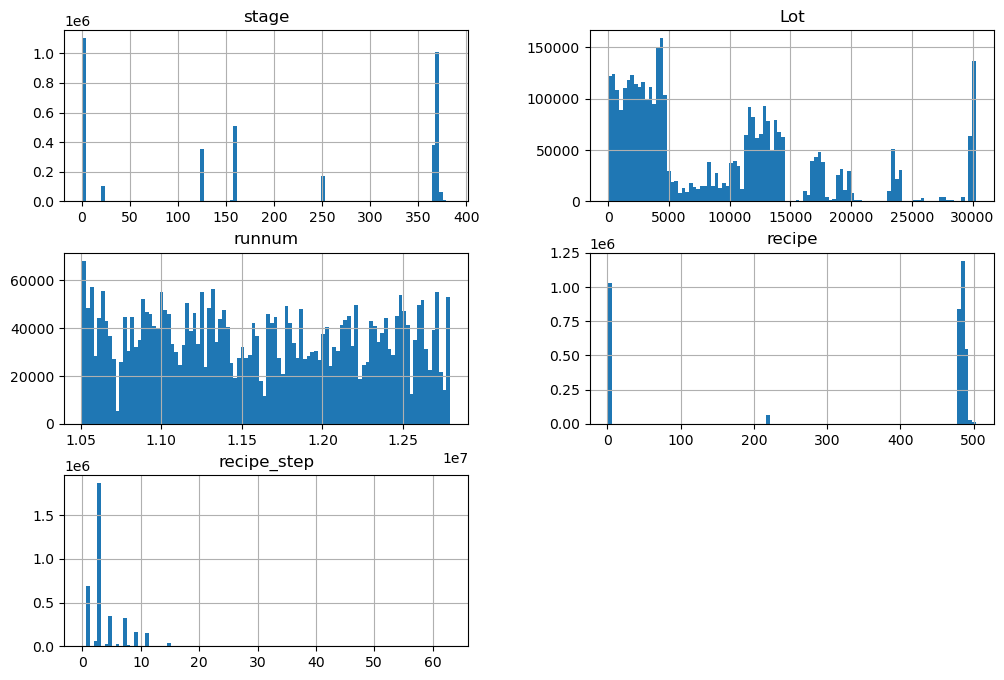

In [9]:
dataTrain[['stage', 'Lot', 'runnum', 'recipe', 'recipe_step']].hist(figsize=(12,8),bins=100)

Distribución de Datos en Variables Float vs Eventos de Falla

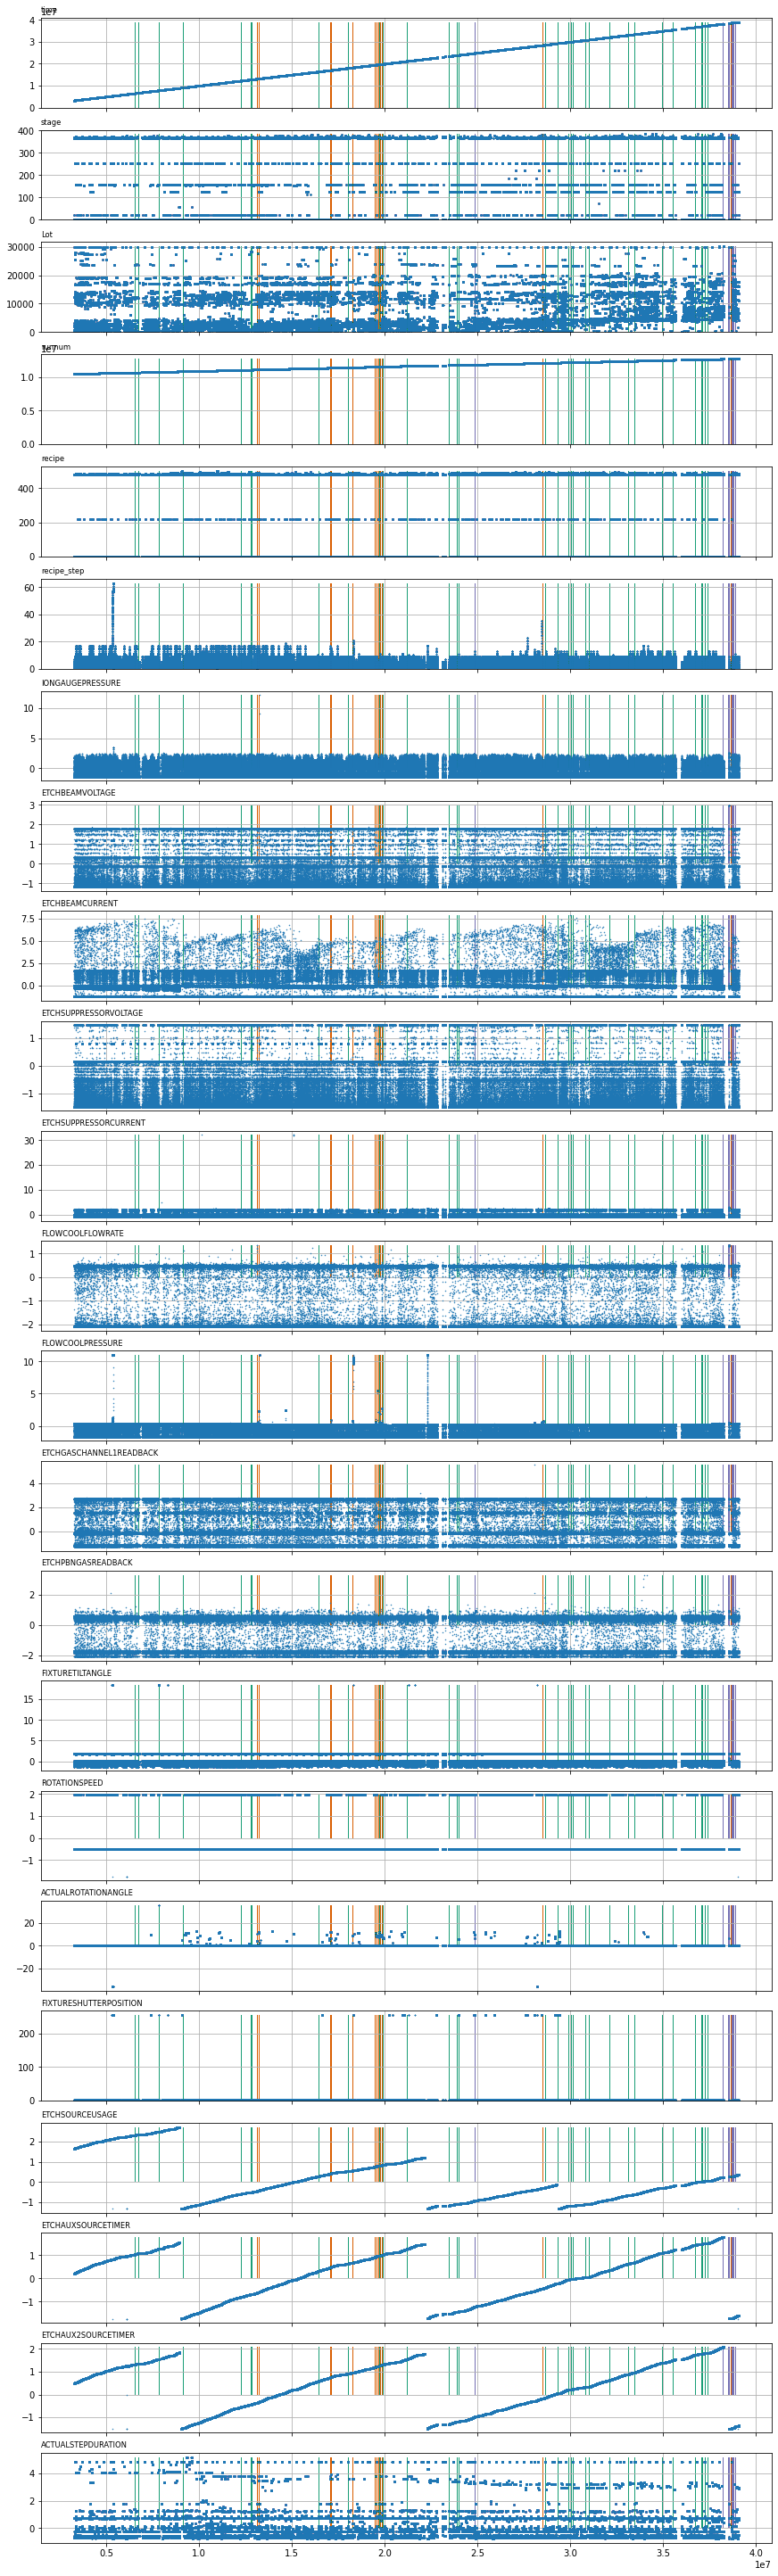

CPU times: total: 32 s
Wall time: 34.4 s


In [10]:
%%time
dataPlot = dataTrain.drop('Tool', axis=1)
faults = dataFault['fault_name'].unique()
fig, axs = plt.subplots(23, 1, figsize=(12, 40), constrained_layout=True, sharex=True)
for nn, ax in enumerate(axs.flat):
    column = dataPlot.columns[nn]
    line, = ax.plot('time', column, 'o', markersize=0.5, data=dataPlot, lw=2.5)
    ax.set_title(column, fontsize='small', loc='left')
    ax.grid()
    mx = np.max(dataPlot[column])
    for idx, x in enumerate(faults):
        ln = len(dataFault['fault_name'][dataFault['fault_name'] == x])
        values = pd.DataFrame(data = [mx for i in range(ln)])[0]
        ax.bar(dataFault['time'][dataFault['fault_name'] == x],
                values, 25000, color = plt.get_cmap("Dark2").colors[idx], label = x)
plt.show()

Tabla de Correlación de Variables

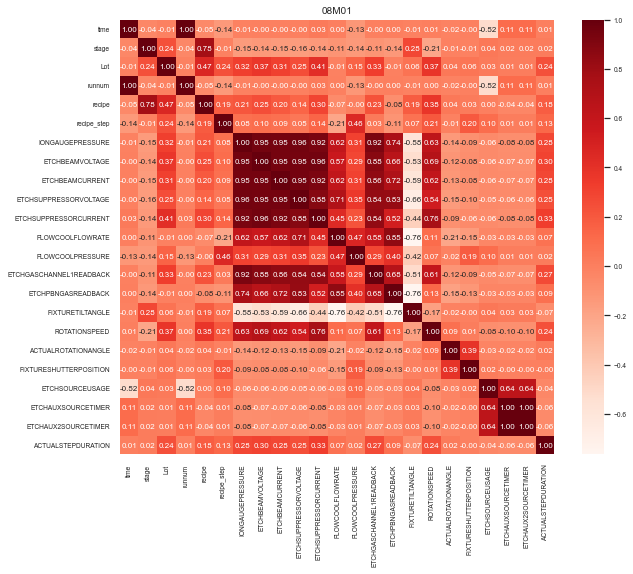

CPU times: total: 4.72 s
Wall time: 6.11 s


In [11]:
%%time
sns.set(font_scale=0.6)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(dataTrain.corr(),cmap=plt.cm.Reds,annot=True, square = True, fmt='.2f', annot_kws={'size': 8})
plt.title(dataTrain.iloc[1, 1], fontsize=10)
plt.show()

In [12]:
feat = ['ETCHSUPPRESSORVOLTAGE', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER', 'ACTUALSTEPDURATION']

Pre-proccesing

In [10]:
data = dataTrain.copy()

In [12]:
%%time
# Completamos el dataset con los eventos de falla (fault-type y fault)
datasetTrain = faultData(data, dataFault)

Wall time: 29.6 s


In [13]:
datasetTrain['Target'].value_counts()

No Fault    3715983
Fault           109
Name: Target, dtype: int64

In [14]:
datasetTrain['fault_type'].value_counts()

No Fault                                          3715983
FlowCool Pressure Dropped Below Limit                  66
Flowcool Pressure Too High Check Flowcool Pump         30
Flowcool leak                                          13
Name: fault_type, dtype: int64

In [15]:
# Encoding
le_target = LabelEncoder()
datasetTrain['Target'] = le_target.fit_transform(datasetTrain['Target'])
le_type = LabelEncoder()
datasetTrain['fault_type'] = le_type.fit_transform(datasetTrain['fault_type'])

In [16]:
for i in datasetTrain['Target'].unique():
    print(i, le_target.inverse_transform([i]))

1 ['No Fault']
0 ['Fault']


In [17]:
for i in datasetTrain['fault_type'].unique():
    print(i, le_type.inverse_transform([i]))

3 ['No Fault']
0 ['FlowCool Pressure Dropped Below Limit']
1 ['Flowcool Pressure Too High Check Flowcool Pump']
2 ['Flowcool leak']


In [18]:
datasetTrain.describe().round(2)

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,fault_type,Target
count,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,...,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00
mean,20548124.23,191.97,8911.95,11618751.41,345.17,4.12,0.07,0.08,0.06,0.05,...,-0.00,0.12,0.04,2.28,0.10,0.09,0.37,0.03,3.00,1.00
std,10519227.87,156.51,8073.17,674256.50,216.31,4.15,1.06,1.06,1.05,1.04,...,1.01,1.07,1.14,20.06,1.13,0.98,1.00,1.04,0.01,0.01
min,3283162.00,1.00,2.00,10511435.00,1.00,0.00,-1.40,-1.18,-1.27,-1.49,...,-1.24,-1.74,-35.75,0.00,-1.33,-1.74,-1.50,-0.78,0.00,0.00
25%,11334545.00,1.00,2494.00,11021465.00,1.00,3.00,-0.65,-1.00,-1.26,-1.24,...,-0.71,-0.51,-0.09,0.00,-0.78,-0.74,-0.48,-0.57,3.00,1.00
50%,19852540.00,159.00,4856.00,11590682.00,482.00,3.00,-0.04,-0.13,0.01,0.16,...,0.02,-0.51,-0.09,1.00,-0.22,0.26,0.54,-0.50,3.00,1.00
75%,29690815.00,368.00,13218.00,12207946.00,483.00,5.00,0.69,0.31,0.02,0.16,...,0.11,1.95,-0.09,1.00,0.69,0.92,1.21,0.70,3.00,1.00
max,39071100.00,383.00,30261.00,12791590.00,503.00,63.00,12.21,2.99,7.89,1.49,...,18.40,1.95,35.58,255.00,2.72,1.77,2.08,5.19,3.00,1.00


In [19]:
datasetTrain.corr()[['fault_type']].sort_values(by = 'fault_type', ascending = False)

,fault_type
fault_type,1.000000
Target,0.962694
FLOWCOOLFLOWRATE,0.007456
ETCHPBNGASREADBACK,0.006246
FLOWCOOLPRESSURE,0.005700
ETCHSUPPRESSORVOLTAGE,0.005075
ETCHBEAMCURRENT,0.004260
IONGAUGEPRESSURE,0.004167
ETCHBEAMVOLTAGE,0.003936
ETCHGASCHANNEL1READBACK,0.003836


In [20]:
datasetTrain.corr()[['Target']].sort_values(by = 'Target', ascending = False)

,Target
Target,1.000000
fault_type,0.962694
FLOWCOOLFLOWRATE,0.007436
ETCHPBNGASREADBACK,0.006221
FLOWCOOLPRESSURE,0.005697
ETCHSUPPRESSORVOLTAGE,0.004983
ETCHBEAMCURRENT,0.004162
IONGAUGEPRESSURE,0.004040
ETCHBEAMVOLTAGE,0.003812
ETCHGASCHANNEL1READBACK,0.003667


PRIMER DATASET MODELO: Datos Originales

In [21]:
datasetTrain.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,fault_type,Target
0,3283162,08M01,366,2465,10511435,481,3,-0.018959,-0.132713,0.012500,...,-0.981442,-0.511561,-0.08616,1.0,1.658163,0.209741,0.487876,-0.696642,3,1
1,3283166,08M01,366,2465,10511435,481,3,-0.018959,-0.131884,0.014437,...,-0.981442,-0.511561,-0.08616,1.0,1.658165,0.209744,0.487879,-0.696642,3,1
2,3283170,08M01,366,2465,10511435,481,3,-0.018959,-0.132437,0.001577,...,-0.981442,-0.511561,-0.08616,1.0,1.658167,0.209747,0.487882,-0.696642,3,1
3,3283174,08M01,366,2465,10511435,481,3,-0.018959,-0.132713,0.018836,...,-0.981442,-0.511561,-0.08616,1.0,1.658170,0.209750,0.487885,-0.696642,3,1
4,3283178,08M01,366,2465,10511435,481,3,-0.018959,-0.131607,0.006156,...,-0.981442,-0.511561,-0.08616,1.0,1.658172,0.209752,0.487888,-0.696642,3,1


In [54]:
datasetTrain.shape

(3716092, 26)

Proceso de completar la serie de tiempo faltante

In [27]:
data = dataTrain

In [28]:
%%time
dataSeq = timeSeq(data, 20000)

Wall time: 8min 51s


In [29]:
# Dataset base para preprocesamiento
dataSeq.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,filled
0,3283162,08M01,366.0,2465.0,10511435.0,481.0,3.0,-0.018959,-0.132713,0.012500,...,0.549830,-0.981442,-0.511561,-0.08616,1.0,1.658163,0.209741,0.487876,-0.696642,0
1,3283166,08M01,366.0,2465.0,10511435.0,481.0,3.0,-0.018959,-0.131884,0.014437,...,0.549830,-0.981442,-0.511561,-0.08616,1.0,1.658165,0.209744,0.487879,-0.696642,0
2,3283170,08M01,366.0,2465.0,10511435.0,481.0,3.0,-0.018959,-0.132437,0.001577,...,0.549830,-0.981442,-0.511561,-0.08616,1.0,1.658167,0.209747,0.487882,-0.696642,0
3,3283174,08M01,366.0,2465.0,10511435.0,481.0,3.0,-0.018959,-0.132713,0.018836,...,0.566786,-0.981442,-0.511561,-0.08616,1.0,1.658170,0.209750,0.487885,-0.696642,0
4,3283178,08M01,366.0,2465.0,10511435.0,481.0,3.0,-0.018959,-0.131607,0.006156,...,0.566786,-0.981442,-0.511561,-0.08616,1.0,1.658172,0.209752,0.487888,-0.696642,0


In [30]:
dataSeq.shape

(5500842, 25)

In [31]:
dataSeq.describe().round(2)

,time,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,...,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,filled
count,5500842.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,...,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,3716092.00,5500842.00
mean,21179785.07,191.97,8911.95,11618751.41,345.17,4.12,0.07,0.08,0.06,0.05,...,-0.01,-0.00,0.12,0.04,2.28,0.10,0.09,0.37,0.03,0.32
std,10506321.65,156.51,8073.17,674256.50,216.31,4.15,1.06,1.06,1.05,1.04,...,1.01,1.01,1.07,1.14,20.06,1.13,0.98,1.00,1.04,0.47
min,3283162.00,1.00,2.00,10511435.00,1.00,0.00,-1.40,-1.18,-1.27,-1.49,...,-2.08,-1.24,-1.74,-35.75,0.00,-1.33,-1.74,-1.50,-0.78,0.00
25%,11834523.00,1.00,2494.00,11021465.00,1.00,3.00,-0.65,-1.00,-1.26,-1.24,...,0.46,-0.71,-0.51,-0.09,0.00,-0.78,-0.74,-0.48,-0.57,0.00
50%,21039298.00,159.00,4856.00,11590682.00,482.00,3.00,-0.04,-0.13,0.01,0.16,...,0.56,0.02,-0.51,-0.09,1.00,-0.22,0.26,0.54,-0.50,0.00
75%,30342255.00,368.00,13218.00,12207946.00,483.00,5.00,0.69,0.31,0.02,0.16,...,0.57,0.11,1.95,-0.09,1.00,0.69,0.92,1.21,0.70,1.00
max,39071100.00,383.00,30261.00,12791590.00,503.00,63.00,12.21,2.99,7.89,1.49,...,3.31,18.40,1.95,35.58,255.00,2.72,1.77,2.08,5.19,1.00


In [32]:
dataSeq.drop('filled', axis=1, inplace=True)

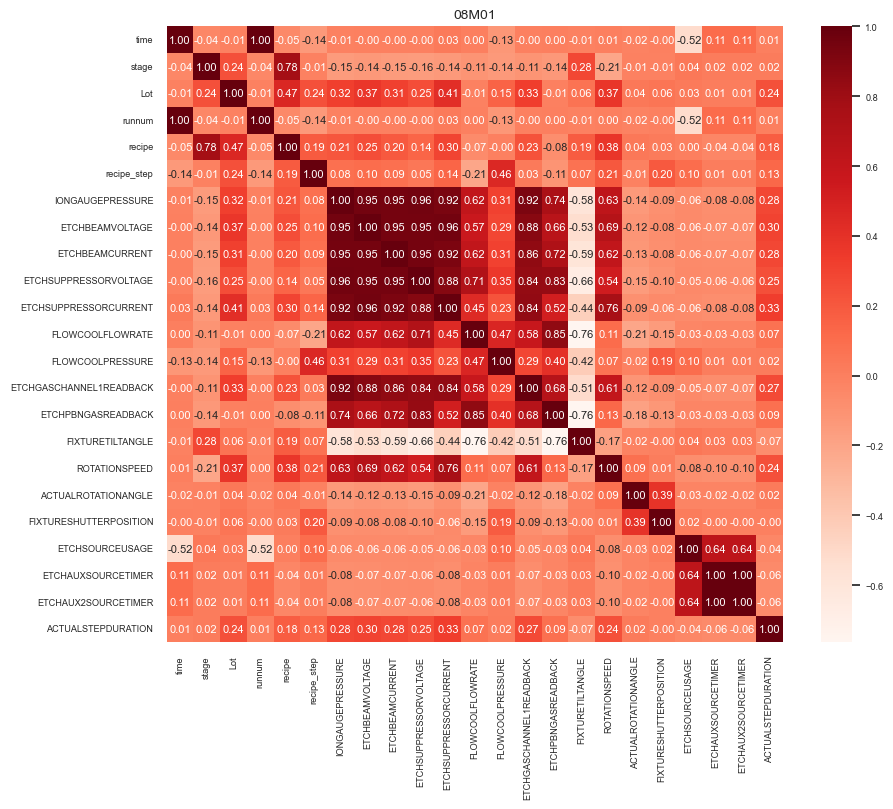

Wall time: 7.24 s


In [34]:
%%time
sns.set(font_scale=0.6)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(dataSeq.corr(),cmap=plt.cm.Reds,annot=True, square = True, fmt='.2f', annot_kws={'size': 8})
plt.title(dataTrain.iloc[1, 1], fontsize=10)
plt.show()

In [35]:
# Se detalla la cantidad de datos a completar 
dataSeq.isnull().sum()

time                             0
Tool                       1784750
stage                      1784750
Lot                        1784750
runnum                     1784750
recipe                     1784750
recipe_step                1784750
IONGAUGEPRESSURE           1784750
ETCHBEAMVOLTAGE            1784750
ETCHBEAMCURRENT            1784750
ETCHSUPPRESSORVOLTAGE      1784750
ETCHSUPPRESSORCURRENT      1784750
FLOWCOOLFLOWRATE           1784750
FLOWCOOLPRESSURE           1784750
ETCHGASCHANNEL1READBACK    1784750
ETCHPBNGASREADBACK         1784750
FIXTURETILTANGLE           1784750
ROTATIONSPEED              1784750
ACTUALROTATIONANGLE        1784750
FIXTURESHUTTERPOSITION     1784750
ETCHSOURCEUSAGE            1784750
ETCHAUXSOURCETIMER         1784750
ETCHAUX2SOURCETIMER        1784750
ACTUALSTEPDURATION         1784750
dtype: int64

In [36]:
%%time
# Completamos la secuencia de datos faltante
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dataFilled = pd.DataFrame(imp.fit_transform(dataSeq), columns= dataSeq.columns)

Wall time: 1min 8s


In [37]:
dataFilled[['time','stage', 'Lot', 'runnum', 'recipe', 'recipe_step']] = dataFilled[['time','stage', 'Lot', 'runnum', 'recipe', 'recipe_step']].astype(int, )
dataFilled[['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION']] = dataFilled[['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION']].astype(float)

In [38]:
%%time
# Incluir datos de falla
datasetFilled = faultData(dataFilled, dataFault)

Wall time: 42.9 s


In [39]:
# Encoding
le_target = LabelEncoder()
datasetFilled['Target'] = le_target.fit_transform(datasetFilled['Target'])
le_type = LabelEncoder()
datasetFilled['fault_type'] = le_type.fit_transform(datasetFilled['fault_type'])

In [40]:
for i in datasetFilled['Target'].unique():
    print(i, le_target.inverse_transform([i]))

1 ['No Fault']
0 ['Fault']


In [41]:
for i in datasetTrain['fault_type'].unique():
    print(i, le_type.inverse_transform([i]))

3 ['No Fault']
0 ['FlowCool Pressure Dropped Below Limit']
1 ['Flowcool Pressure Too High Check Flowcool Pump']
2 ['Flowcool leak']


In [42]:
datasetFilled.corr()[['Target']].sort_values(by = 'Target', ascending = False)

,Target
Target,1.000000
fault_type,0.957546
FLOWCOOLFLOWRATE,0.003753
ETCHPBNGASREADBACK,0.002983
FLOWCOOLPRESSURE,0.002233
ETCHSUPPRESSORVOLTAGE,0.002031
ETCHGASCHANNEL1READBACK,0.001787
ETCHBEAMVOLTAGE,0.001785
ETCHBEAMCURRENT,0.001769
IONGAUGEPRESSURE,0.001640


In [43]:
datasetFilled.corr()[['fault_type']].sort_values(by = 'fault_type', ascending = False)

,fault_type
fault_type,1.000000
Target,0.957546
FLOWCOOLFLOWRATE,0.003516
ETCHPBNGASREADBACK,0.002780
FLOWCOOLPRESSURE,0.002261
ETCHSUPPRESSORVOLTAGE,0.002113
ETCHGASCHANNEL1READBACK,0.001871
ETCHBEAMCURRENT,0.001858
ETCHBEAMVOLTAGE,0.001795
IONGAUGEPRESSURE,0.001761


In [44]:
features = ['time','stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION']

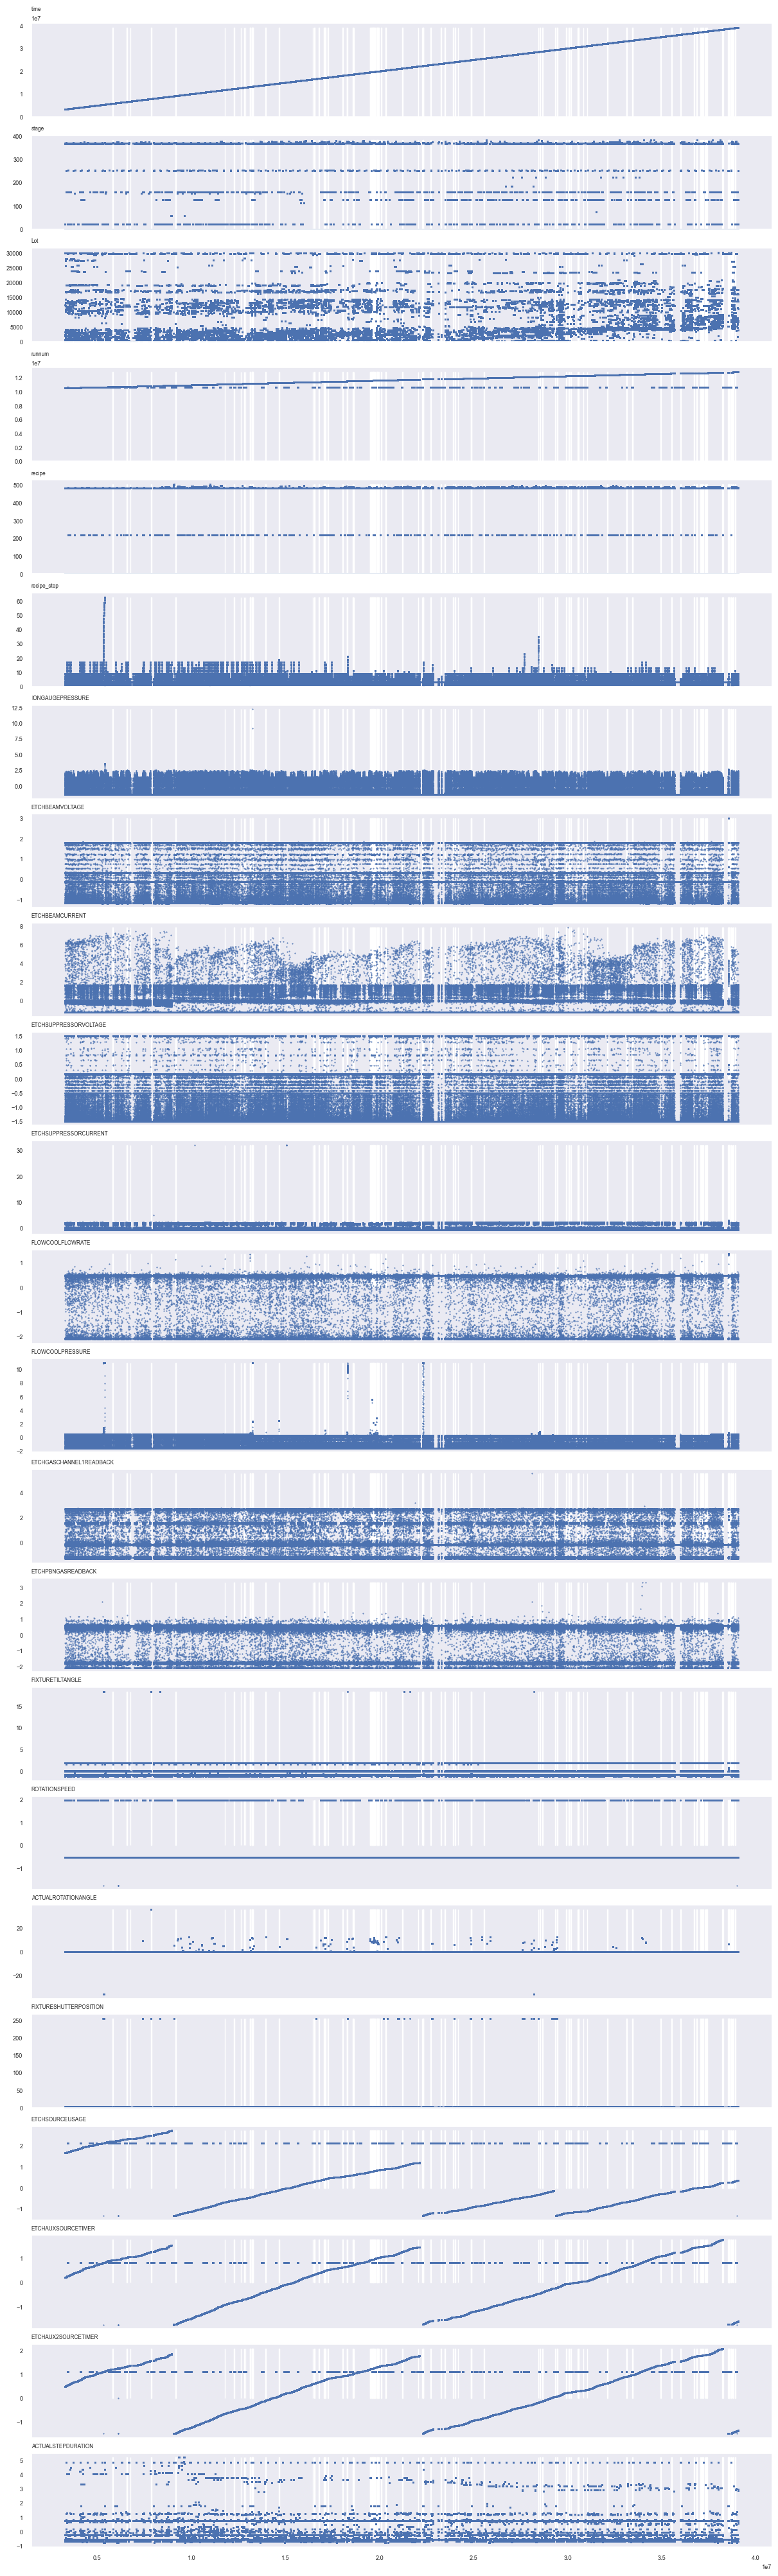

Wall time: 1min 4s


In [46]:
%%time
dataPlot = datasetFilled[features]
faults = dataFault['fault_name'].unique()
fig, axs = plt.subplots(23, 1, figsize=(12, 40), constrained_layout=True, sharex=True)
for nn, ax in enumerate(axs.flat):
    column = dataPlot.columns[nn]
    line, = ax.plot('time', column, 'o', markersize=0.5, data=dataPlot, lw=2.5)
    ax.set_title(column, fontsize='small', loc='left')
    ax.grid()
    mx = np.max(dataPlot[column])
    for idx, x in enumerate(faults):
        ln = len(dataFault['fault_name'][dataFault['fault_name'] == x])
        values = pd.DataFrame(data = [mx for i in range(ln)])[0]
        ax.bar(dataFault['time'][dataFault['fault_name'] == x],
                values, 25000, color = plt.get_cmap("Dark2").colors[idx], label = x)
plt.show()

SEGUNDO DATASET MODELO: Datos Originales con secuencia de tiempo completo

In [51]:
datasetFilled.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,fault_type,Target
0,3283162,08M01,366,2465,10511435,481,3,-0.018959,-0.132713,0.012500,...,-0.981442,-0.511561,-0.08616,1.0,1.658163,0.209741,0.487876,-0.696642,3,1
1,3283166,08M01,366,2465,10511435,481,3,-0.018959,-0.131884,0.014437,...,-0.981442,-0.511561,-0.08616,1.0,1.658165,0.209744,0.487879,-0.696642,3,1
2,3283170,08M01,366,2465,10511435,481,3,-0.018959,-0.132437,0.001577,...,-0.981442,-0.511561,-0.08616,1.0,1.658167,0.209747,0.487882,-0.696642,3,1
3,3283174,08M01,366,2465,10511435,481,3,-0.018959,-0.132713,0.018836,...,-0.981442,-0.511561,-0.08616,1.0,1.658170,0.209750,0.487885,-0.696642,3,1
4,3283178,08M01,366,2465,10511435,481,3,-0.018959,-0.131607,0.006156,...,-0.981442,-0.511561,-0.08616,1.0,1.658172,0.209752,0.487888,-0.696642,3,1


In [52]:
datasetFilled.shape

(5500842, 26)

PCA

In [180]:
features = ['ETCHSUPPRESSORVOLTAGE', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER', 'ACTUALSTEPDURATION']

In [181]:
%%time
X = dataTrain[features]
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

Wall time: 6.61 s


In [182]:
datasetPca = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [183]:
datasetPca.head()

,PC1,PC2
0,-1.286374,-0.477204
1,-1.286374,-0.477232
2,-1.286365,-0.476624
3,-1.286344,-0.477294
4,-1.286345,-0.477351


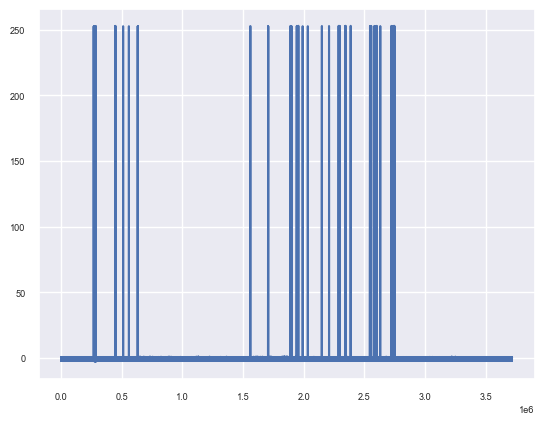

In [184]:
plt.plot(datasetPca['PC1'])

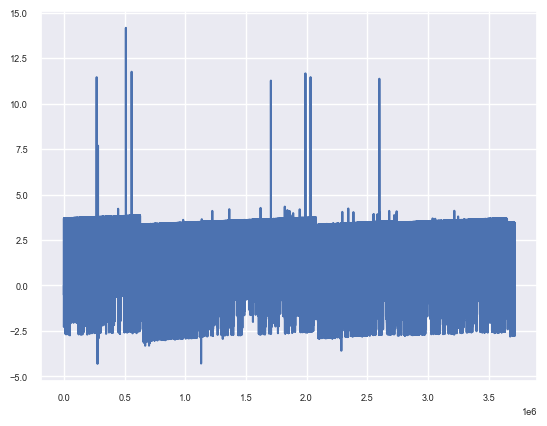

In [185]:
plt.plot(datasetPca['PC2'])

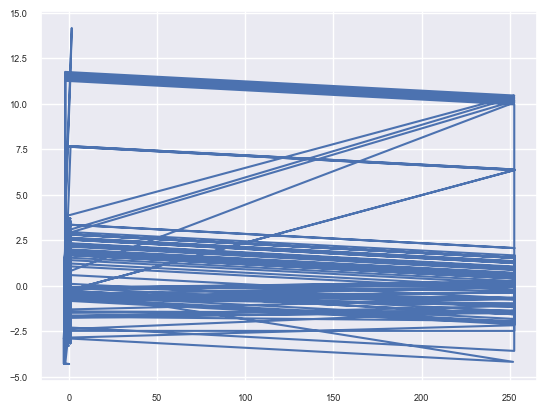

In [186]:
plt.plot('PC1', 'PC2', data = datasetPca)

In [187]:
pca.explained_variance_ratio_

array([0.97675029, 0.00731236])

In [188]:
datasetPca[['fault_type', 'Target']] = datasetTrain[['fault_type', 'Target']]

Entrenamiento de Modelos - Dataset Original

Preparación del dataset

In [139]:
data = datasetTrain.copy()

In [150]:
features = ['ETCHSUPPRESSORVOLTAGE', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER', 'ACTUALSTEPDURATION']

In [151]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

In [152]:
# Normalized Features
X[:3]

array([[ 0.10627417,  0.49089715,  0.36628088, -0.97101779, -0.58480167,
        -0.10794934, -0.0640347 ,  1.38860391,  0.11850431, -0.70175886],
       [ 0.10632494,  0.49089715,  0.36628088, -0.97101779, -0.58480167,
        -0.10794934, -0.0640347 ,  1.38860593,  0.11850724, -0.70175886],
       [ 0.10617582,  0.48984257,  0.36628088, -0.97101779, -0.58480167,
        -0.10794934, -0.0640347 ,  1.38860795,  0.11851017, -0.70175886]])

In [153]:
# Encoded Classes
data[['Target', 'fault_type']]

,Target,fault_type
0,1,3
1,1,3
2,1,3
3,1,3
4,1,3
...,...,...
3716087,1,3
3716088,1,3
3716089,1,3
3716090,1,3


Aplicación de técnicas

KNN

In [154]:
# División de los conjuntos de Train/Test
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:(len(X)+1)]
y_train, y_test = data['Target'][0:train_size], data['Target'][train_size:(len(X)+1)]
print(len(X_train), len(X_test))

2601264 1114828


In [155]:
X_train[10]

array([ 0.10647406,  0.49179865,  0.36858841, -0.97101779, -0.58480167,
       -0.10794934, -0.0640347 ,  1.38862409,  0.11853507, -0.70175886])

In [156]:
%%time
# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

Wall time: 36min 3s


In [157]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0      37]
 [      1 1114791]]


In [158]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0     124]
 [      1 1114704]]


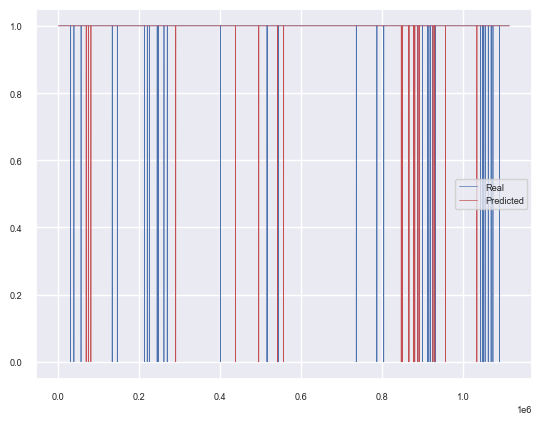

In [159]:
plt.plot(y_test.to_numpy(), label = 'Real', lw = 0.5)
plt.plot(pred, color = 'r',  label = 'Predicted', lw = 0.5)
plt.legend()

LOCAL OUTLIER FACTOR

In [160]:
ctm = data['Target'][data['Target'] == 0].shape[0] / X.shape[0] 

In [161]:
ctm

2.9331889522649062e-05

In [162]:
clf = LocalOutlierFactor(n_neighbors=35, contamination = ctm)

In [163]:
%%time
pred = clf.fit_predict(X)

Wall time: 18min 14s


In [164]:
pred = [0 if i==-1 else 1 for i in pred]

In [165]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0      99]
 [      1 3715993]]


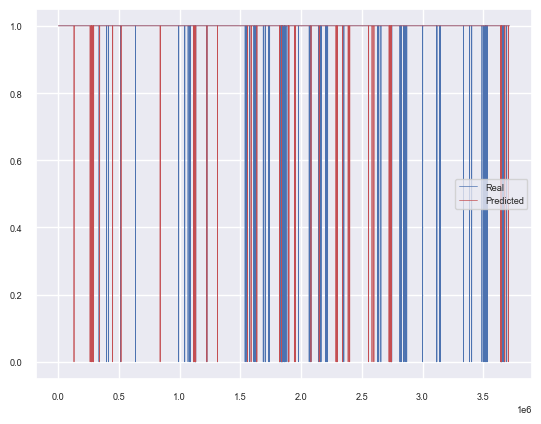

In [166]:
plt.plot(data['Target'], label = 'Real', lw = 0.5)
plt.plot(pred, color = 'r',  label = 'Predicted', lw = 0.5)
plt.legend()

Entrenamiento de Modelos - Dataset Original con Reducción de Dimensionalidad PCA

Preparación del dataset

In [282]:
data = datasetPca.copy()

In [283]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(data[['PC1', 'PC2']])

In [284]:
# Normalized Features
X[:3]

array([[-0.06411762, -0.27490157],
       [-0.06411763, -0.274918  ],
       [-0.0641172 , -0.27456756]])

In [285]:
# Encoded Classes
datasetTrain[['Target', 'fault_type']]

,Target,fault_type
0,1,3
1,1,3
2,1,3
3,1,3
4,1,3
...,...,...
3716087,1,3
3716088,1,3
3716089,1,3
3716090,1,3


In [286]:
# Train/Test
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:(len(X)+1)]
y_train, y_test = data['Target'][0:train_size], data['Target'][train_size:(len(X)+1)]
print(len(X_train), len(X_test))

2601264 1114828


Aplicación de técnicas

KNN with PCA

In [196]:
%%time
# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

Wall time: 26.4 s


In [197]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0     297]
 [      1 1114531]]


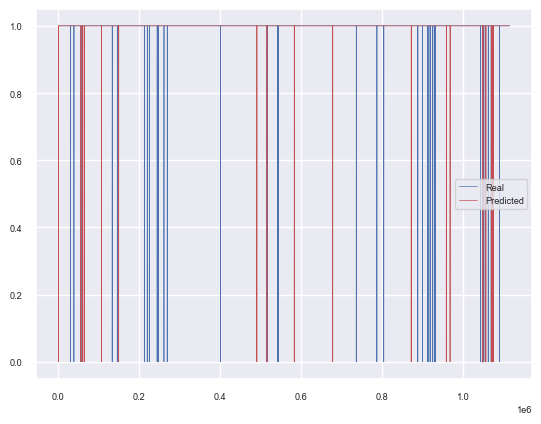

In [198]:
plt.plot(y_test.to_numpy(), label = 'Real', lw = 0.5)
plt.plot(pred, color = 'r',  label = 'Predicted', lw = 0.5)
plt.legend()

LOCAL OUTLIER FACTOR with PCA

In [254]:
ctm = data['Target'][data['Target'] == 0].shape[0] / X.shape[0] 

In [255]:
clf = LocalOutlierFactor(n_neighbors=35, contamination = ctm)

In [256]:
%%time
pred = clf.fit_predict(X)

Wall time: 44.5 s


In [257]:
pred = [0 if i==-1 else 1 for i in pred]

In [258]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0     105]
 [      1 3715987]]


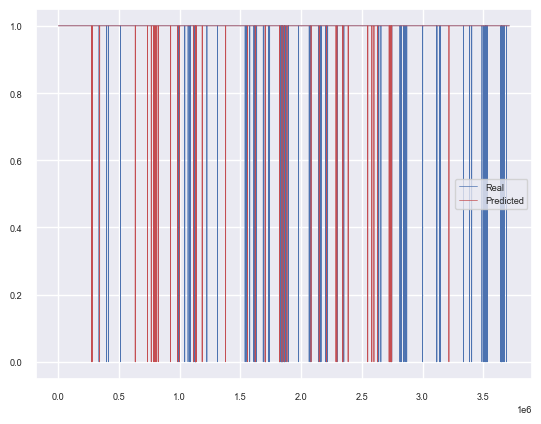

In [261]:
plt.plot(data['Target'], label = 'Real', lw = 0.5)
plt.plot(pred, color = 'r',  label = 'Predicted', lw = 0.5)
plt.legend()

OneClassSVM con PCA

In [262]:
ctm = 72 / X_train.shape[0]

In [263]:
%%time
model = OneClassSVM(nu=ctm, kernel = 'rbf', gamma = 'auto')
model.fit(X_train)

Wall time: 48.3 s


OneClassSVM(gamma='auto', nu=2.767885151218792e-05)

In [264]:
%%time
pred = model.predict(X_test)

Wall time: 11.4 s


In [265]:
pred = [0 if i==-1 else 1 for i in pred]

In [266]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0      37]
 [      1 1114791]]


In [267]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0     468]
 [      1 1114360]]


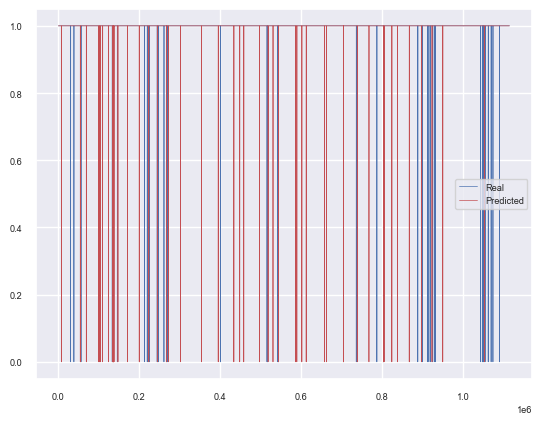

In [268]:
plt.plot(y_test.to_numpy(), label = 'Real', lw = 0.5)
plt.plot(pred, color = 'r',  label = 'Predicted', lw = 0.5)
plt.legend()

Entrenamiento de Modelos - Dataset Original con secuencia de Datos Completa

Preparación del dataset

In [294]:
data = datasetFilled.copy()

In [295]:
features = ['ETCHSUPPRESSORVOLTAGE', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER', 'ACTUALSTEPDURATION']

In [296]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

In [297]:
# Normalized Features
X[:3]

array([[ 0.5448525 ,  0.38903418,  0.80210003, -0.84091707, -0.45602441,
        -0.08855828, -0.05259631,  0.67716153, -0.13468479, -0.60575288],
       [ 0.54489979,  0.38903418,  0.80210003, -0.84091707, -0.45602441,
        -0.08855828, -0.05259631,  0.67716324, -0.1346815 , -0.60575288],
       [ 0.54476089,  0.38779831,  0.80210003, -0.84091707, -0.45602441,
        -0.08855828, -0.05259631,  0.67716495, -0.13467822, -0.60575288]])

In [298]:
# Encoded Classes
datasetTrain[['Target', 'fault_type']]

,Target,fault_type
0,1,3
1,1,3
2,1,3
3,1,3
4,1,3
...,...,...
3716087,1,3
3716088,1,3
3716089,1,3
3716090,1,3


In [299]:
# Train/Test
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:(len(X)+1)]
y_train, y_test = data['Target'][0:train_size], data['Target'][train_size:(len(X)+1)]
print(len(X_train), len(X_test))

3850589 1650253


KNN con Secuencia de Datos Completa

In [277]:
%%time
# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Modelo entrenado')
pred = knn.predict(X_test)

Modelo entrenado
Wall time: 4h 1min 14s


In [278]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0      40]
 [      1 1650213]]


In [279]:
unique, counts = np.unique(pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[      0      17]
 [      1 1650236]]


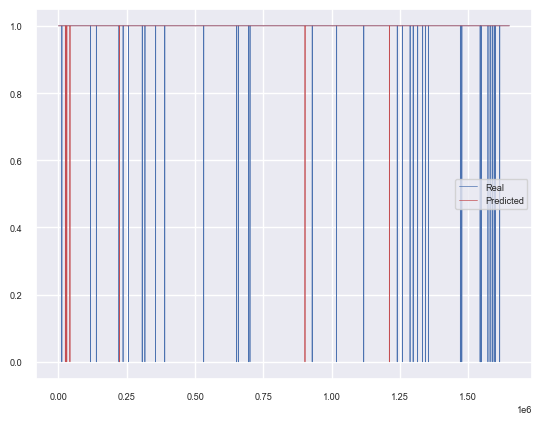

In [280]:
plt.plot(y_test.to_numpy(), label = 'Real', lw = 0.5)
plt.plot(pred, color = 'r',  label = 'Predicted', lw = 0.5)
plt.legend()